In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

warnings.filterwarnings("ignore")
colors = sns.color_palette("Accent")

# Exploration Findings

1. **Dataset Overview**
   - The data has `4372  rows × 14 columns`
   
3. **Preprocessing notes**
   - Change `CustomerID` to object
   - Change `MostFrequentHour` to object
   - Remove the negative values in the `TotalSpent`

4. **Feature engineering notes**



## Loading data

In [42]:
df = pd.read_csv("customers_data.csv")
invioce_df = pd.read_csv("data.csv", encoding="ISO-8859-1")  # invoice data

In [44]:
# Change data types
invioce_df["CustomerID"] = invioce_df["CustomerID"].dropna().astype("int").astype("str")
invioce_df["InvoiceDate"] = pd.to_datetime(invioce_df["InvoiceDate"])

# We will drop the values of cusomerID
invioce_df = invioce_df.dropna(subset=["CustomerID"])
invioce_df = invioce_df.drop_duplicates()

# Add TotalPrice column
TotalPrice = []
for index in range(len(invioce_df)):
    TotalPrice.append(
        invioce_df["Quantity"].iloc[index] * invioce_df["UnitPrice"].iloc[index]
    )

invioce_df["TotalPrice"] = TotalPrice

# Add day of the week column
invioce_df["DayOfWeek"] = invioce_df["InvoiceDate"].dt.day_name()
invioce_df["Hour"] = invioce_df["InvoiceDate"].dt.hour.astype(str)

# Add canceled column
invioce_df["Canceled"] = invioce_df["InvoiceNo"].apply(lambda x: 1 if "C" in x else 0)

invioce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,Hour,Canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday,8,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Wednesday,8,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,0


In [5]:
df.head()

,CustomerID,TotalOrders,TotalSpent,AverageSpent,ItemsBought,CanceledInvoices,MostFrequentDay,MostFrequentHour,ProductDiversity,FirstPurchase,LastPurchase,Country,LifeTime,Recency
0,12346,1,0.00,0.000000,0,1,Tuesday,10,1,2011-01-18 10:01:00,2011-01-18 10:17:00,United Kingdom,0,325
1,12347,7,4310.00,23.681319,2458,0,Tuesday,14,103,2010-12-07 14:57:00,2011-12-07 15:52:00,Iceland,365,1
2,12348,4,1797.24,57.975484,2341,0,Thursday,19,22,2010-12-16 19:09:00,2011-09-25 13:13:00,Finland,282,74
3,12349,1,1757.55,24.076027,631,0,Monday,9,73,2011-11-21 09:51:00,2011-11-21 09:51:00,Italy,0,18
4,12350,1,334.40,19.670588,197,0,Wednesday,16,17,2011-02-02 16:01:00,2011-02-02 16:01:00,Norway,0,309


In [45]:
# Convert MostFrequentHour, CustomerID to object
df["MostFrequentHour"] = df["MostFrequentHour"].astype(str)
df["CustomerID"] = df["CustomerID"].astype(str)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4330 entries, 0 to 4329
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        4330 non-null   object 
 1   TotalOrders       4330 non-null   int64  
 2   TotalSpent        4330 non-null   float64
 3   AverageSpent      4330 non-null   float64
 4   ItemsBought       4330 non-null   int64  
 5   CanceledInvoices  4330 non-null   int64  
 6   MostFrequentDay   4330 non-null   object 
 7   MostFrequentHour  4330 non-null   object 
 8   ProductDiversity  4330 non-null   int64  
 9   FirstPurchase     4330 non-null   object 
 10  LastPurchase      4330 non-null   object 
 11  Country           4330 non-null   object 
 12  LifeTime          4330 non-null   int64  
 13  Recency           4330 non-null   int64  
 14  RFM               4330 non-null   float64
dtypes: float64(3), int64(6), object(6)
memory usage: 507.6+ KB


## Basic insights

In [8]:
df.describe()

,TotalOrders,TotalSpent,AverageSpent,ItemsBought,CanceledInvoices,ProductDiversity,LifeTime,Recency
count,4330.000000,4330.000000,4330.000000,4330.000000,4330.000000,4330.000000,4330.000000,4330.000000
mean,3.097229,1914.953479,31.223864,1130.338799,2.012471,61.760277,134.336259,89.347806
std,6.725555,8255.262801,104.820883,4694.211036,7.334740,85.653043,132.902648,99.125094
min,-99.000000,0.000000,0.000000,-189.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,299.395000,11.404790,156.250000,0.000000,16.000000,0.000000,16.000000
50%,2.000000,652.570000,17.015341,369.500000,0.000000,36.000000,99.500000,49.000000
75%,4.000000,1623.922500,23.702218,970.000000,1.000000,78.000000,257.000000,137.000000
max,178.000000,279489.020000,3861.000000,196719.000000,226.000000,1794.000000,373.000000,373.000000


In [9]:
print("Number of unique customers: ", invioce_df["CustomerID"].nunique())
print("Number of unique countries: ", invioce_df["Country"].nunique())
print("Number of unique products: ", invioce_df["StockCode"].nunique())

Number of unique customers:  4372


Number of unique countries:  37
Number of unique products:  3684


In [10]:
print("Toal revenue:", round(invioce_df["TotalPrice"].sum(), 2), "Dollars")

Toal revenue: 8278519.42 Dollars


In [11]:
print(
    f"Most selling product is {invioce_df['StockCode'].mode()[0]}, which is '{invioce_df['Description'].mode()[0]}'"
)

percentage = (
    invioce_df[invioce_df["StockCode"] == "85123A"]["TotalPrice"].sum()
    / invioce_df["TotalPrice"].sum()
) * 100

print(f"It represents {percentage:.2f}% of the total revenue")

Most selling product is 85123A, which is 'WHITE HANGING HEART T-LIGHT HOLDER'
It represents 1.13% of the total revenue


In [12]:
print(f"The average CLV is {df['TotalSpent'].mean():.2f} Dollars")
print(f"The median CLV is {df['TotalSpent'].median():.2f} Dollars")

The average CLV is 1914.95 Dollars
The median CLV is 652.57 Dollars


In [13]:
print(
    f"The average number of orders per customer per life time is {df['TotalOrders'].mean():.2f}"
)
print(
    f"The median number of orders per customer per life time is {df['TotalOrders'].median():.2f}"
)

The average number of orders per customer per life time is 3.10
The median number of orders per customer per life time is 2.00


In [14]:
print(f"The average life time of each customer is {df['LifeTime'].mean():.2f} days")
print(f"The median life time of each customer is {df['LifeTime'].median():.2f} days")

The average life time of each customer is 134.34 days
The median life time of each customer is 99.50 days


In [15]:
print(f"The average Recency of each customer is {df['Recency'].mean():.2f} days")
print(f"The median Recency of each customer is {df['Recency'].median():.2f} days")

The average Recency of each customer is 89.35 days
The median Recency of each customer is 49.00 days


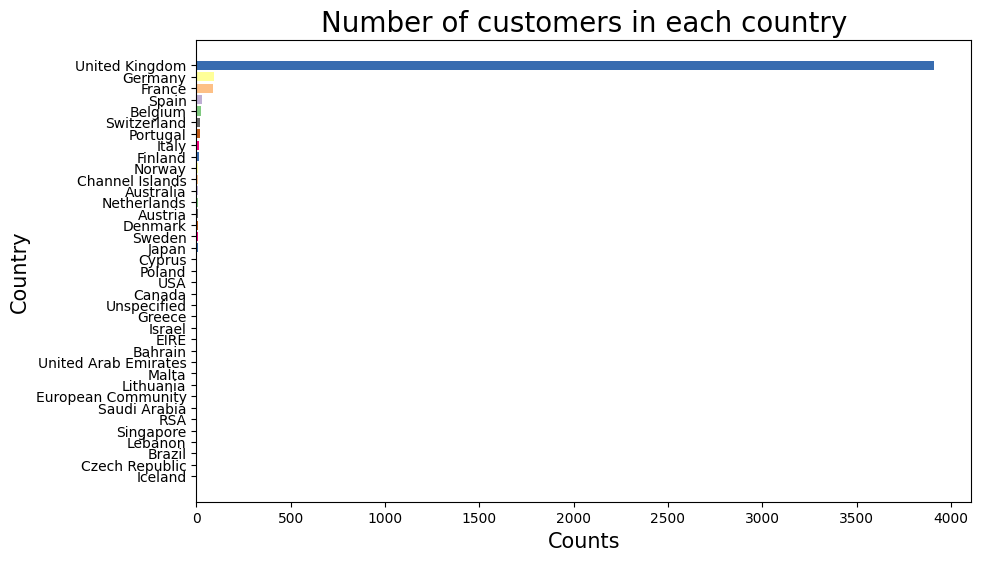

In [16]:
plt.figure(figsize=(10, 6))

data = df["Country"].value_counts(ascending=True)

plt.barh(data.index, data.values, color=colors)
plt.title("Number of customers in each country", size=20)
plt.xlabel("Counts", size=15)
plt.ylabel("Country", size=15);

This was expected as the stores are already based in the UK

In [17]:
# Calculate the demands across the week

# First group the data by the invoice, as each row doesn't represent a single invoice, but a single product in an invoice
grouped_invoices_df = invioce_df.groupby(["InvoiceNo"]).agg(
    {"DayOfWeek": lambda x: x.mode()[0], "TotalPrice": "mean"}
)
grouped_week_day = grouped_invoices_df.groupby(["DayOfWeek"]).agg(
    {"TotalPrice": ["sum", "mean"]}
)
grouped_week_day

TotalPrice           
                     sum       mean
DayOfWeek                          
Friday     135129.136142  40.264939
Monday      97083.253308  27.643295
Sunday      49572.296680  21.166651
Thursday   173752.136618  34.904005
Tuesday    160436.047573  41.222006
Wednesday  147046.370835  35.777706

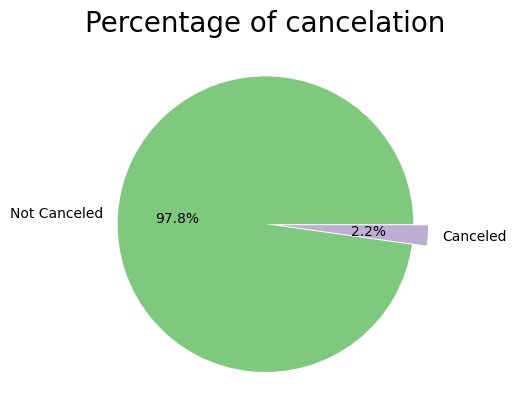

In [18]:
# percentage of cancelation
data = invioce_df["Canceled"].value_counts()

plt.pie(
    data,
    labels=["Not Canceled", "Canceled"],
    autopct="%1.1f%%",
    colors=colors,
    explode=(0, 0.1),
)
plt.title("Percentage of cancelation", size=20);

In [19]:
# Calculate the demands across Hours

# First group the data by the invoice, as each row doesn't represent a single invoice, but a single product in an invoice
grouped_invoices_df = invioce_df.groupby(["InvoiceNo"]).agg(
    {"Hour": lambda x: x.mode()[0], "TotalPrice": "mean"}
)
grouped_hour = grouped_invoices_df.groupby(["Hour"]).agg({"TotalPrice": ["sum"]})
grouped_hour

,TotalPrice
,sum
Hour,
10,120456.291318
11,103752.831510
12,131318.797682
13,101223.678724
14,61673.394470
15,74481.005194
16,48239.837749
17,8773.936141


## Analysis